In [56]:
!pip install datasets

In [57]:
from datasets import load_dataset
data = load_dataset("ylecun/mnist")
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [58]:
# Preprocessing of the data

import numpy as np

train_images = np.array(data["train"]["image"])
train_labels = np.array(data["train"]["label"])

test_images = np.array(data["test"]["image"])
y_test = np.array(data["test"]["label"])

# Normalization of all the data
train_images_norm=train_images/255
test_images_norm=test_images/255

n1=train_images.shape[0]
n2=test_images.shape[0]

# Flattening the data to make it 1-D from 2-D
train_images_flat=train_images_norm.reshape([n1,-1])
x_test=test_images_norm.reshape([n2,-1])

In [59]:
# Setting a random seed
np.random.seed(42)

# Defining the number of initially labeled samples
num_labeled = 10000

# Generating random indices for the labeled dataset
labeled_indices = np.random.choice(len(train_images_flat), num_labeled, replace=False)

# Spliting the datasets into labeled and unlabeled datasets
x_train = train_images_flat[labeled_indices]
y_train = train_labels[labeled_indices]

## Vanilla Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

start_time = time.time()
# Training using vanilla Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
end_time = time.time()

# Calculating training time
training_time_model_1 = end_time-start_time

# Predicting the value on test and rounding it off to closest integer and cliping it from 0 to 9
y_pred = lin_reg.predict(x_test)
y_pred = np.round(y_pred).astype(int)
y_pred = np.clip(y_pred, 0, 9)

In [61]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_model_1=(accuracy_score(y_test,y_pred))*100
precision_percentage_model_1=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_model_1=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_model_1=(f1_score(y_test,y_pred, average="weighted"))*100

print("Vanilla Linear Regression Stats:")
print(f"Accuracy: {accuracy_percentage_model_1:.2f}%")
print(f"Precision: {precision_percentage_model_1:.2f}%")
print(f"Recall: {recall_percentage_model_1:.2f}%")
print(f"F1 Score: {f1_percentage_model_1:.2f}%")
print(f"Training time: {training_time_model_1:.2f}sec")

Vanilla Linear Regression Stats:
Accuracy: 22.42%
Precision: 28.31%
Recall: 22.42%
F1 Score: 22.95%
Training time: 7.65sec


## Polynomial Regression
This can't be performed as each digit has 28 * 28 parameters which make 28 * 28 * 28 * 28 coefficients for degree 2 amking it intensively high for the computer to handle. \
So, we can reduce the dimension of it to 2 or 3 using PCA or tSNE and then apply polynomial regression.

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

start_time = time.time()
degree = 5
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_pca)
x_test_poly = poly.fit_transform(x_test_pca)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_train_poly,y_train)
end_time = time.time()

# Calculating training time
training_time_model_2 = end_time-start_time

# Predicting the value on test and rounding it off to closest integer and cliping it from 0 to 9
y_pred = lin_reg_2.predict(x_test_poly)
y_pred = np.round(y_pred).astype(int)
y_pred = np.clip(y_pred, 0, 9)

In [63]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_model_2=(accuracy_score(y_test,y_pred))*100
precision_percentage_model_2=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_model_2=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_model_2=(f1_score(y_test,y_pred, average="weighted"))*100

print("Polynomial Regression Stats:")
print(f"Accuracy: {accuracy_percentage_model_2:.2f}%")
print(f"Precision: {precision_percentage_model_2:.2f}%")
print(f"Recall: {recall_percentage_model_2:.2f}%")
print(f"F1 Score: {f1_percentage_model_2:.2f}%")
print(f"Training time: {training_time_model_2:.2f}sec")

Polynomial Regression Stats:
Accuracy: 19.96%
Precision: 24.59%
Recall: 19.96%
F1 Score: 19.82%
Training time: 0.04sec


## Guassian Basis Function Regression

In [64]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Apply PCA to reduce to 1 dimensions
pca = PCA(n_components=1)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Creating Gaussian basis functions (Hyperparameters)
start_time = time.time()
degree = 50
centers = np.linspace(-10, 10, degree).reshape(-1, 1)
sigma = 2.0

# Compute Gaussian basis functions
x_train_g = np.exp(-((x_train_pca - centers.T) ** 2) / (2 * sigma**2))
x_test_g = np.exp(-((x_test_pca - centers.T) ** 2) / (2 * sigma**2))

# Training Linear Regression model
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_train_g, y_train)
end_time = time.time()

# Calculating training time
training_time_model_3 = end_time-start_time

# Predicting the value on test and rounding it off to closest integer and cliping it from 0 to 9
y_pred = lin_reg_3.predict(x_test_g)
y_pred = np.round(y_pred).astype(int)
y_pred = np.clip(y_pred, 0, 9)

In [65]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_model_3=(accuracy_score(y_test,y_pred))*100
precision_percentage_model_3=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_model_3=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_model_3=(f1_score(y_test,y_pred, average="weighted"))*100

print("Guassian Feature Regression Stats:")
print(f"Accuracy: {accuracy_percentage_model_3:.2f}%")
print(f"Precision: {precision_percentage_model_3:.2f}%")
print(f"Recall: {recall_percentage_model_3:.2f}%")
print(f"F1 Score: {f1_percentage_model_3:.2f}%")
print(f"Training time: {training_time_model_3:.2f}sec")

Guassian Feature Regression Stats:
Accuracy: 15.66%
Precision: 20.19%
Recall: 15.66%
F1 Score: 14.26%
Training time: 0.12sec


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Fourier Features Regreesion

In [66]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Apply PCA to reduce to 1 dimensions
pca = PCA(n_components=1)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Creating Fourier Function
start_time = time.time()
num_terms = 50

# Compute Fourier basis features
x_train_fourier = np.hstack([np.sin((i+1) * x_train_pca) for i in range(num_terms)] +
                            [np.cos((i+1) * x_train_pca) for i in range(num_terms)])

x_test_fourier = np.hstack([np.sin((i+1) * x_test_pca) for i in range(num_terms)] +
                           [np.cos((i+1) * x_test_pca) for i in range(num_terms)])

# Training Linear Regression model
lin_reg_4 = LinearRegression()
lin_reg_4.fit(x_train_fourier, y_train)
end_time = time.time()

# Calculating training time
training_time_model_4 = end_time-start_time

# Predicting the value on test and rounding it off to closest integer and cliping it from 0 to 9
y_pred = lin_reg_4.predict(x_test_fourier)
y_pred = np.round(y_pred).astype(int)
y_pred = np.clip(y_pred, 0, 9)

In [67]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_model_4=(accuracy_score(y_test,y_pred))*100
precision_percentage_model_4=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_model_4=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_model_4=(f1_score(y_test,y_pred, average="weighted"))*100

print("Fourier Feature Regression Stats:")
print(f"Accuracy: {accuracy_percentage_model_4:.2f}%")
print(f"Precision: {precision_percentage_model_4:.2f}%")
print(f"Recall: {recall_percentage_model_4:.2f}%")
print(f"F1 Score: {f1_percentage_model_4:.2f}%")
print(f"Training time: {training_time_model_4:.2f}sec")

Fourier Feature Regression Stats:
Accuracy: 8.34%
Precision: 3.42%
Recall: 8.34%
F1 Score: 3.82%
Training time: 1.54sec


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Conclusion
Any type of linear regression is not good for digit recognition as:
1. Linear regression assumes that the relationship between inputs pixel values and outputs labels are linearly separable.
2. Images are highly complex and non-linear.
3. We are using PCA for dimensionality reduction making the data too similar which reduces the accuracy.
4. We are rounding off and clipping the values in 0 - 9 making it discrete problem.

Thus, linear regression is good for countinous output but bad for discrete output like in digit recognition.

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Training Logistic Regression model
start_time = time.time()
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(x_train, y_train)
end_time = time.time()
training_time_log_reg = end_time-start_time

# Make predictions
y_pred = log_reg.predict(x_test)

In [69]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_log_reg=(accuracy_score(y_test,y_pred))*100
precision_percentage_log_reg=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_log_reg=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_log_reg=(f1_score(y_test,y_pred, average="weighted"))*100

print("Logistic Regression Stats:")
print(f"Accuracy: {accuracy_percentage_log_reg:.2f}%")
print(f"Precision: {precision_percentage_log_reg:.2f}%")
print(f"Recall: {recall_percentage_log_reg:.2f}%")
print(f"F1 Score: {f1_percentage_log_reg:.2f}%")
print(f"Training time: {training_time_log_reg:.2f}sec")

Logistic Regression Stats:
Accuracy: 90.82%
Precision: 90.81%
Recall: 90.82%
F1 Score: 90.80%
Training time: 16.72sec


 Implementing the logistic regresion without using direct function. We are finding logits and probability through with we are finding loss and updating W and b according to this.

In [70]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))

# Initialize weights and bias
num_features = x_train.shape[1]

# Intialize seed for reprociblity
np.random.seed(42)

# Initialize the weights and biasness
W = np.random.randn(num_features, 10) * 0.01
b = np.zeros((1, 10))

# Hyperparameters (can change and see difference)
learning_rate = 0.1
epochs = 500

# Training loop
start_time = time.time()
for epoch in range(epochs):
    # Compute logits: Z = XW + b
    logits = np.dot(x_train, W) + b

    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Compute loss
    loss = -np.mean(np.sum(y_train_onehot * np.log(probs + 1e-8), axis=1))

    grad_logits = probs - y_train_onehot
    dW = np.dot(x_train.T, grad_logits) / x_train.shape[0]
    db = np.mean(grad_logits, axis=0, keepdims=True)

    # Updating weights and biasness
    W -= learning_rate * dW
    b -= learning_rate * db

end_time = time.time()
training_time_log_reg_2 = end_time - start_time

# Predicting the value
logits_test = np.dot(x_test, W) + b
y_pred = np.argmax(logits_test, axis=1)

In [71]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_log_reg_2=(accuracy_score(y_test,y_pred))*100
precision_percentage_log_reg_2=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_log_reg_2=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_log_reg_2=(f1_score(y_test,y_pred, average="weighted"))*100

print("Logistic Regression Stats:")
print(f"Accuracy: {accuracy_percentage_log_reg_2:.2f}%")
print(f"Precision: {precision_percentage_log_reg_2:.2f}%")
print(f"Recall: {recall_percentage_log_reg_2:.2f}%")
print(f"F1 Score: {f1_percentage_log_reg_2:.2f}%")
print(f"Training time: {training_time_log_reg_2:.2f}sec")

Logistic Regression Stats:
Accuracy: 90.20%
Precision: 90.17%
Recall: 90.20%
F1 Score: 90.16%
Training time: 34.21sec


## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Training a Random Forest classifier
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, criterion='entropy', bootstrap=True)
rf_model.fit(x_train, y_train)
end_time = time.time()
training_time_random_forest = end_time - start_time

# Make predictions
y_pred = rf_model.predict(x_test)

In [73]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_random_forest=(accuracy_score(y_test,y_pred))*100
precision_percentage_random_forest=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_random_forest=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_random_forest=(f1_score(y_test,y_pred, average="weighted"))*100

print("Random Forest Stats:")
print(f"Accuracy: {accuracy_percentage_random_forest:.2f}%")
print(f"Precision: {precision_percentage_random_forest:.2f}%")
print(f"Recall: {recall_percentage_random_forest:.2f}%")
print(f"F1 Score: {f1_percentage_random_forest:.2f}%")
print(f"Training time: {training_time_random_forest:.2f}sec")

Random Forest Stats:
Accuracy: 95.10%
Precision: 95.10%
Recall: 95.10%
F1 Score: 95.09%
Training time: 20.23sec


## K MEANS (KNN)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Training KNN classifier
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn_model.fit(x_train, y_train)
end_time = time.time()
training_time_knn = end_time - start_time

# Make predictions
y_pred = knn_model.predict(x_test)

In [75]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_knn=(accuracy_score(y_test,y_pred))*100
precision_percentage_knn=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_knn=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_knn=(f1_score(y_test,y_pred, average="weighted"))*100

print("K Means Stats:")
print(f"Accuracy: {accuracy_percentage_knn:.2f}%")
print(f"Precision: {precision_percentage_knn:.2f}%")
print(f"Recall: {recall_percentage_knn:.2f}%")
print(f"F1 Score: {f1_percentage_knn:.2f}%")
print(f"Training time: {training_time_knn:.2f}sec")

K Means Stats:
Accuracy: 94.57%
Precision: 94.67%
Recall: 94.57%
F1 Score: 94.55%
Training time: 0.01sec


## Neural Networks(NN)

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import numpy as np

# Converting NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Creating DataLoader for batch processing
batch_size = 128
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Defining Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Hidden Layer 1
        self.fc2 = nn.Linear(128, 64)   # Hidden Layer 2
        self.fc3 = nn.Linear(64,32)     # Hidden Layer 3
        self.fc4 = nn.Linear(32,16)     # Hidden Layer 4
        self.fc5 = nn.Linear(16, 10)    # Output Layer

    def forward(self, x):
        # Activation function (ReLU)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initializing model, loss function, and optimizer
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 10
for epoch in range(epochs):
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

end_time = time.time()
training_time_nn = end_time - start_time

# Evaluate the model
model.eval()
y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = model(x_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
y_pred = np.array(y_pred)

In [77]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_nn=(accuracy_score(y_test,y_pred))*100
precision_percentage_nn=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_nn=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_nn=(f1_score(y_test,y_pred, average="weighted"))*100

print("Neural Network Stats:")
print(f"Accuracy: {accuracy_percentage_nn:.2f}%")
print(f"Precision: {precision_percentage_nn:.2f}%")
print(f"Recall: {recall_percentage_nn:.2f}%")
print(f"F1 Score: {f1_percentage_nn:.2f}%")
print(f"Training time: {training_time_nn:.2f}sec")

Neural Network Stats:
Accuracy: 92.77%
Precision: 92.92%
Recall: 92.77%
F1 Score: 92.75%
Training time: 4.11sec


## Convolutional Neural Network(CNN)

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import numpy as np

# Converting NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train.reshape(-1, 1, 28, 28), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test.reshape(-1, 1, 28, 28), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Creating DataLoader for batch processing
batch_size = 128
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Defining LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # (1, 28, 28) -> (6, 24, 24)
        self.conv2 = nn.Conv2d(6, 16, 5) # (6, 12, 12) -> (16, 8, 8)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initializing model, loss function, and optimizer
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the LeNet-5 model
epochs = 10
for epoch in range(epochs):
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

end_time =time.time()
training_time_cnn = end_time - start_time

# Evaluate the model
model.eval()
y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = model(x_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
y_pred = np.array(y_pred)

In [79]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_cnn=(accuracy_score(y_test,y_pred))*100
precision_percentage_cnn=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_cnn=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_cnn=(f1_score(y_test,y_pred, average="weighted"))*100

print("Convolutional Neural Network Stats:")
print(f"Accuracy: {accuracy_percentage_cnn:.2f}%")
print(f"Precision: {precision_percentage_cnn:.2f}%")
print(f"Recall: {recall_percentage_cnn:.2f}%")
print(f"F1 Score: {f1_percentage_cnn:.2f}%")
print(f"Training time: {training_time_cnn:.2f}sec")

Convolutional Neural Network Stats:
Accuracy: 97.16%
Precision: 97.17%
Recall: 97.16%
F1 Score: 97.15%
Training time: 18.26sec


## Support Vector Machine(SVM)

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import numpy

svm_model = SVC(kernel='rbf', C=10, gamma='scale')

# Training the SVM model
start_time = time.time()
svm_model.fit(x_train, y_train)
end_time = time.time()
training_time_svm = end_time - start_time

# Predict on test data
y_pred = svm_model.predict(x_test)

In [81]:
# Finding accuracy, precision, recall and f1 score for the model
accuracy_percentage_svm=(accuracy_score(y_test,y_pred))*100
precision_percentage_svm=(precision_score(y_test, y_pred, average="weighted"))*100
recall_percentage_svm=(recall_score(y_test,y_pred, average="weighted"))*100
f1_percentage_svm=(f1_score(y_test,y_pred, average="weighted"))*100

print("Support Vector Machine Stats:")
print(f"Accuracy: {accuracy_percentage_svm:.2f}%")
print(f"Precision: {precision_percentage_svm:.2f}%")
print(f"Recall: {recall_percentage_svm:.2f}%")
print(f"F1 Score: {f1_percentage_svm:.2f}%")
print(f"Training time: {training_time_svm:.2f}sec")

Support Vector Machine Stats:
Accuracy: 97.01%
Precision: 97.01%
Recall: 97.01%
F1 Score: 97.01%
Training time: 19.22sec


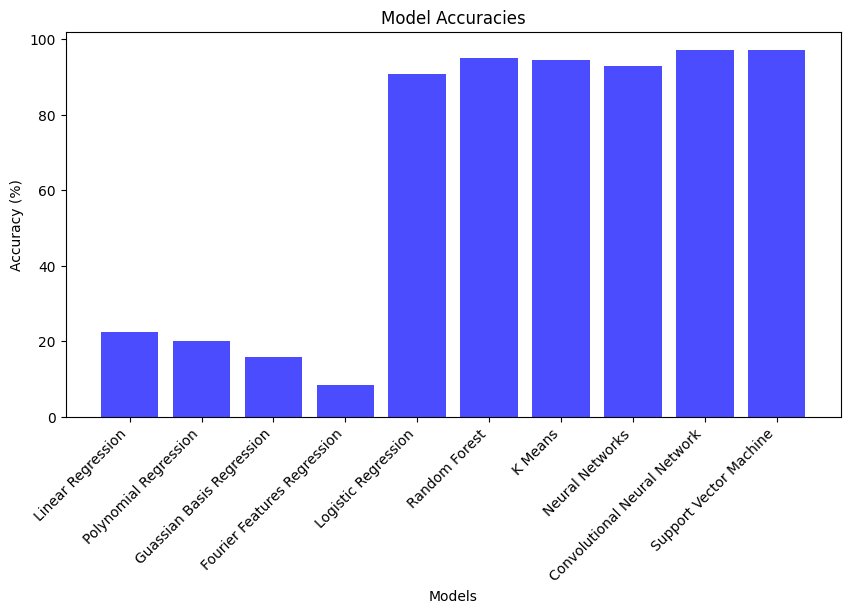

In [82]:
# Plotting bar plot for representing the model accuracies
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Polynomial Regression', 'Guassian Basis Regression', 'Fourier Features Regression',
          'Logistic Regression', 'Random Forest', 'K Means', 'Neural Networks', 'Convolutional Neural Network', 'Support Vector Machine']

accuracies = [accuracy_percentage_model_1, accuracy_percentage_model_2, accuracy_percentage_model_3, accuracy_percentage_model_4,
              accuracy_percentage_log_reg, accuracy_percentage_random_forest, accuracy_percentage_knn, accuracy_percentage_nn,
              accuracy_percentage_cnn, accuracy_percentage_svm]

x_positions = np.arange(len(models))

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.bar(x_positions, accuracies, color='blue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.xticks(x_positions, models, rotation=45, ha='right')

plt.show()

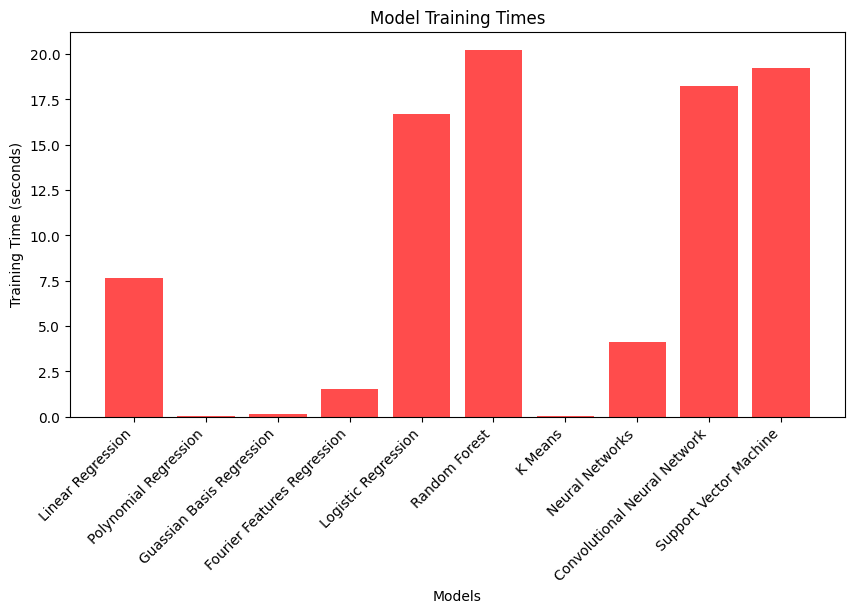

In [83]:
# Plotting bar plot for representing the model training time
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Polynomial Regression', 'Guassian Basis Regression', 'Fourier Features Regression',
          'Logistic Regression', 'Random Forest', 'K Means', 'Neural Networks', 'Convolutional Neural Network', 'Support Vector Machine']

training_times = [training_time_model_1, training_time_model_2, training_time_model_3, training_time_model_4,
                  training_time_log_reg, training_time_random_forest, training_time_knn, training_time_nn,
                  training_time_cnn, training_time_svm]

x_positions = np.arange(len(models))

# Plot Training Time
plt.figure(figsize=(10, 5))
plt.bar(x_positions, training_times, color='red', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Times')
plt.xticks(x_positions, models, rotation=45, ha='right')

plt.show()

## Conclusion - Logistic Regression, Random Forest, K Means, Neural Networks, Convolutional Neural Network, Support Vector Machine all are giving more than 90% accuracies which supports that all of these models are good for digit recognision.

1. On the basis of time required to train the model K Means is giving the best results on the least time to get trained
2. On the basis of accuracy CNN and SVD are giving the best results with accuracies upto 97% which supports the model if time is not a factor.


By this project I learnt how too use different models and how to train them, which is the best for using in the real world and with its integration with NLP we can make OCR's.

#### References -
1. https://github.com/nipunbatra/ml-teaching
2. https://huggingface.co/datasets
3. https://iopscience.iop.org/article/10.1088/1757-899X/1022/1/012108/pdf
4. ChatGPT